In [21]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
sns.set_style('white')

In [22]:
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.drop(['income'], axis=1)

df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


In [23]:
# Ridge Regression model
ridgeregr = linear_model.Ridge(alpha=1, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

ridgeregrBig = linear_model.Ridge(alpha=1, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
theScore = ridgeregrBig.score(X_train2, Y_train)
print(ridgeregrBig.score(X_train2, Y_train))
newparams = ridgeregrBig.coef_[0, 0:len(origparams)]

0.5738763314696387
[ 1.36703420e-02 -7.59304411e-01  4.31732134e-06]
0.5739686014515943


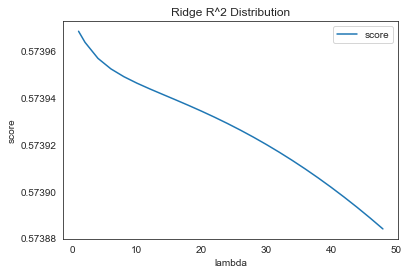

In [24]:
estimates = np.append([theScore], [1])

# Storing legend information.
labels = []

#Run the model for many alphas.
for lambd in range(2, 50, 2):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    theScore = ridgeregrBig.score(X_train2, Y_train)
    estimates = np.row_stack((
        estimates,
        np.append([theScore],[lambd])))

# Make the data pretty.
estimates_df = pd.DataFrame(
    data=estimates,
    columns=['score', 'lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:1,])

# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('score')
plt.title('Ridge R^2 Distribution')
plt.legend(labels)
plt.show()

In [25]:
# Lasso Regression model
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
theScore = lassBig.score(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301185

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897096

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


In [26]:
print(lassfit.coef_)
print(lassfit.intercept_)

[-0.         -0.40657726 -0.        ]
[0.00114596]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


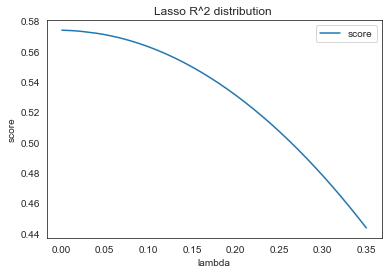

In [27]:
scores = np.append([theScore], [0.35])

labels = []

# R2R2  varies across different values of  λλ  for ridge and lasso regression. 
#Run the model for many alphas.
for lambdx in range(1, 350, 2):
    lambd = lambdx/1000.0
    lassBig = linear_model.Lasso(alpha=lambd)
    lassBig.fit(X_train2, Y_train)
    theScore = lassBig.score(X_train2, Y_train)
    scores = np.row_stack((
        scores,
        np.append([theScore], [lambd])))

# Make the data pretty.
estimates_df = pd.DataFrame(data=scores)
estimates_df.columns = ['score', 'lambd']
estimates_df.sort_values(by='lambd', inplace=True, ascending=True)

varstoplot = list(estimates_df.columns[:1,])

# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(estimates_df['lambd'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('score')
plt.title('Lasso R^2 distribution ')
plt.legend(labels)
plt.show()